# Global Ecological Footprint 2023
**Group 6**
- Jay Michael Carlos
- Seth Jovellana
- Janica Megan Reyes
- Abigail Vicencio

---
The dataset was uploaded by JAINA to the kaggle website and can be accessed through the link (https://www.kaggle.com/datasets/jainaru/global-ecological-footprint-2023).

This dataset was originally used by York University Ecological Footprint Initiative & Global Footprint Network. Public Data Package of the National Footprint and Biocapacity Accounts, 2023 edition. Produced for the Footprint Data Foundation and distributed by Global Footprint Network. Available online at: https://data.footprintnetwork.org.

# I. Dataset Description
This dataset contains measures of various ecological assets that a country needs to produce the natural resources that its population consumes. Six categories are tracked:
- Crop land
- Grazing land
- Fishing grounds
- Built-up (urban) land
- Forest area
- Carbon demand on land
In addition, it also contains other economic factors such as per capita GDP and income group.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from rule_miner import RuleMiner

# Non-essential line for theming. If this theme is ever deprecated in the future, you can remove it with no issue.
plt.style.use('seaborn-v0_8-dark-palette')

In [2]:
# Need a specific encode setting to decode without eror.
eco_df = pd.read_csv('global-ecological-footprint-2023.csv', encoding='latin1')

In [3]:
eco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   182 non-null    object 
 1   Region                                    182 non-null    object 
 2   SDGi                                      159 non-null    object 
 3   Life Exectancy                            176 non-null    object 
 4   HDI                                       173 non-null    object 
 5   Per Capita GDP                            165 non-null    object 
 6   Income Group                              178 non-null    object 
 7   Population (millions)                     182 non-null    object 
 8   Cropland Footprint                        152 non-null    float64
 9   Grazing Footprint                         152 non-null    float64
 10  Forest Product Footprint              

## I.1 Collection process and methodology

The dataset is taken from the 2022 results of the National Footprint and Biocapacity Accounts 2023 Edition by the York University Ecological Footprint Initiative, which measures ecological resource use and the resource regeneration capacity of countries over time. The original data was gathered from UN data sets, with some estimates based on historic data from 1961 to 2019. (York University Ecological Footprint Initiative & Global Footprint Network, 2023)

## I.2 Structure
Each column of the dataset represents a country's measure, such as the average life expectancy or its population. Each row is an observation of the measures per country.

In [4]:
eco_df.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Afghanistan,Middle East/Central Asia,52.5,62,0.48,NaN,LI,40.8,0.4,0.1,...,0.8,0.3,0.1,0.012981,0.000565,0.028232,0.513827,-0.287638,0.530696,1.559795
1,Albania,Other Europe,71.6,76,0.8,"$14,889",UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,"$11,137",UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,"$6,304",LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,"$18,749",HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578


## I.3 Column definitions
0. **Country**: The name of the country being observed.
1. **Region**: The region of the world that the country is in, like Asia-Pacific, North America, Africa, etc.
2. **SDGi**: The SDG Index is a measure of progress of all UN member states on the Sustainable Development Goals.
3. **Life Exectancy** *\(sic\)*: The number of years a person can expect to live. (Esteban Ortiz-Ospina, 2017)
4. **HDI**: The United Nations' Human Development Index is an approximate measure of economic and social development based on three dimensions: health, education, and standard of living. Health is measured by life expectancy at birth, education is measured by mean of years of schooling, and standard of living is measured by gross national income per capita. Each country is then given a value from 0 to 1. An HDI of > 0.7 is considered "high human development". (United Nations Development Programme, 2023)
5. **Per Capita GDP**: Measured as the GDP (gross domestic product) of a nation divided by its population. It is used to measure the prosperity of a nation. (Investopedia, 2024)
6. **Income Group**: The World Bank Group (2023) assigns countries around the world to one of four income groups: low, lower-middle, upper-middle, and high. This is represented in the dataset as LI (low), LM (lower-middle), UM (upper-middle), and HI (high).
7. **Population (millions)**: All people inhabiting a country, shown in millions in the dataset. (Merriam-Webster, 2024)
8. **Cropland Footprint**: The ecological footprint (defined below) used to produce food and fiber for human consumption and feed for livestock and other uses. All footprint is measured in global hectares per person. (York University Ecological Footprint Initiative & Global Footprint Network, 2023)
9. **Grazing Footprint**: The ecological footprint of domestic livestock performing grazing activities. This is measured in global hectares per person (Econation, n.d.).
10. **Forest Product Footprint**: The ecological footprint of converting forest resources into forest products. This is measured in global hectares per person (York University Ecological Footprint Initiative & Global Footprint Network, 2023).
11. **Carbon Footprint**: The ecological footprint of carbon dioxide emissions from burning fossil fuels and cement production. This is measured in global hectares per person (York University Ecological Footprint Initiative & Global Footprint Network, 2023).
12. **Fish Footprint**: The ecological footprint of the population’s consumption of fish products. This is measured in global hectares per person (York University Ecological Footprint Initiative & Global Footprint Network, 2023).
13. **Built up land**: The ecological footprint of land covered with infrastructures. This is measured in global hectares per person (European Environment Agency, n.d.).
14. **Total Ecological Footprint (Consumption)**: A measure of productive land and water area that a population requires to produce all the resources it consumes and to absorb the waste that it generates. This is measured in **global hectares per person**, which is defined as a biologically productive hectare with world average productivity. (York University Ecological Footprint Initiative & Global Footprint Network, 2023)
15. **Cropland**: The biocapacity of land used to produce food and fiber for human consumption and feed. (York University Ecological Footprint Initiative & Global Footprint Network, 2023)
16. **Grazing land**: The biocapacity of land that is suitable for grazing by livestock, commonly covered with grass or herbage. This is measured in global hectares per person. (Foreign-Assisted and Special Projects Service, n.d.)
17. **Forest land**: The biocapacity of land covered with forest or reserved for the growth of forests.  This is measured in global hectares per person. (Foreign-Assisted and Special Projects Service, n.d.)
18. **Fishing ground**: The biocapacity of an area in a body of water where fish can easily be caught. This is measured in global hectares per person. (Collins Dictionary, n.d.)
19. **Built up land**:  The biocapacity to land wherein infrastructure and other facilities can be built. This is measured in global hectares per person. 
20. Total biocapacity: The capacity of biologically productive areas to provide for human demand (footprints). It is also measured in global hectares per person. (York University Ecological Footprint Initiative & Global Footprint Network, 2023)
21. **Ecological (Deficit) or Reserve**: This variable measures a country's ecological footprint relative to its biocapacity. If the country's ecological footprint exceeds its biocapacity, there is an ecological deficit. If the country's biocapacity exceeds its ecological footprint, there is an ecological reserve. Like biocapacity and ecological footprint, this is measured in global hectares per person. (York University Ecological Footprint Initiative & Global Footprint Network, 2023)
22. **Number of Earths required**: The number of planet Earths required for everyone in the world to sustain the resources needed to live the average lifestyle of a person in the observed country. (York University Ecological Footprint Initiative & Global Footprint Network, 2023)
23. **Number of Countries required**: Represents how many times the observed country's total biocapacity is needed to provide for its consumption footprint. (York University Ecological Footprint Initiative & Global Footprint Network, 2023)

# II. Data Cleaning

One of the variables to be used is Per Capita GDP. It is represented with a dollar sign and is formatted with commas for readability, however, to properly visualize it, it must be converted to a standard float value without the dollar sign and commas. Additionally, the 19 missing values must be dropped from the table. There is a total of 182 countries, so dropping 19 countries: 

$$\frac{19}{182} \approx 0.1044 \approx 10.44\%$$

is not going to be a significant issue when it comes to analyzing the data below. Note that while the count of NaN is listed as 17, there are actually two other countries with blank values, although those are mistakenly encoded as a space instead of NaN, so they must be removed too.

In [5]:
cleaned_df = eco_df

In [6]:
cleaned_per_capita_gdp = cleaned_df['Per Capita GDP'].isna().sum()
print('There are', cleaned_per_capita_gdp, 'countries listed as NaN in the per capita GDP column.')

There are 17 countries listed as NaN in the per capita GDP column.


In [7]:
cleaned_df = cleaned_df.replace(' ', np.nan)
cleaned_df = cleaned_df[cleaned_df['Per Capita GDP'].notna()]

cleaned_df.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
1,Albania,Other Europe,71.6,76,0.8,"$14,889",UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,"$11,137",UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,"$6,304",LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,"$18,749",HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578
5,Argentina,South America,72.8,75,0.84,"$22,117",UM,46,0.9,0.5,...,3.2,1.8,1.2,0.591673,1.527615,0.083517,5.231663,2.011045,2.132556,0.615601


In [8]:
cleaned_df['Per Capita GDP'] = cleaned_df['Per Capita GDP'].str.replace('$', '').str.replace(',', '').astype(int)
cleaned_df.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
1,Albania,Other Europe,71.6,76,0.8,14889,UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,11137,UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,6304,LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,18749,HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578
5,Argentina,South America,72.8,75,0.84,22117,UM,46,0.9,0.5,...,3.2,1.8,1.2,0.591673,1.527615,0.083517,5.231663,2.011045,2.132556,0.615601


Another one is **Total Ecological Footprint (Consumption)**, which is measured in global hectares per person. In the following section, a correlation will be formed between it and per capita GDP, among other variables. Unlike the former, however, there are no missing data points, and it is in the proper data type to be analyzed. Thus, there is no need to clean this column.

In [9]:
total_ecological_footprint = cleaned_df['Total Ecological Footprint (Consumption)']
print(total_ecological_footprint.isnull().sum(), 'NaN values found.')
total_ecological_footprint.info()

0 NaN values found.
<class 'pandas.core.series.Series'>
Index: 163 entries, 1 to 179
Series name: Total Ecological Footprint (Consumption)
Non-Null Count  Dtype  
--------------  -----  
163 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


Next is **Population (millions)**. A similar cleaning process to what was done for **Per Capita GDP** is followed.

In [10]:
no_nan_population = cleaned_df['Population (millions)'].isnull().sum()
print('There are', no_nan_population, 'countries listed as NaN in the population column.')

There are 0 countries listed as NaN in the population column.


In [11]:
cleaned_df = cleaned_df.replace(' ', np.nan)
cleaned_df = cleaned_df[cleaned_df['Population (millions)'].notna()]

cleaned_df.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
1,Albania,Other Europe,71.6,76,0.8,14889,UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,11137,UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,6304,LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,18749,HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578
5,Argentina,South America,72.8,75,0.84,22117,UM,46,0.9,0.5,...,3.2,1.8,1.2,0.591673,1.527615,0.083517,5.231663,2.011045,2.132556,0.615601


In [12]:
cleaned_df['Population (millions)'] = cleaned_df['Population (millions)'].str.replace(',', '').astype(float)
cleaned_df.info()
cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 1 to 179
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   163 non-null    object 
 1   Region                                    163 non-null    object 
 2   SDGi                                      149 non-null    object 
 3   Life Exectancy                            163 non-null    object 
 4   HDI                                       162 non-null    object 
 5   Per Capita GDP                            163 non-null    int64  
 6   Income Group                              163 non-null    object 
 7   Population (millions)                     163 non-null    float64
 8   Cropland Footprint                        140 non-null    float64
 9   Grazing Footprint                         140 non-null    float64
 10  Forest Product Footprint                  1

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
1,Albania,Other Europe,71.6,76,0.8,14889,UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,11137,UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,6304,LM,35.0,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,18749,HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578
5,Argentina,South America,72.8,75,0.84,22117,UM,46.0,0.9,0.5,...,3.2,1.8,1.2,0.591673,1.527615,0.083517,5.231663,2.011045,2.132556,0.615601


Next is **Region**, under which each **Country** is grouped into one of the regions below. Unlike population and per capita GDP, region is categorical data. Thus, it has a specific set of values it can have, and must be double-checked for typos and incorrect encoding. As such, the `.unique()` method is used to check all unique values in the column. From the output, it is clear that there are no typos or instances of incorrect encoding in the region column. Thus, no further data cleaning is necessary.

In [13]:
cleaned_df['Region'].unique()

array(['Other Europe', 'Africa', 'Central America/Caribbean',
       'South America', 'Middle East/Central Asia', 'Asia-Pacific',
       'EU-27', 'North America'], dtype=object)

**Income Group** is similar to region in that it is categorical data. A similar inspection process to what was done for region is followed, and like region, there were no instanes of incorrect encoding or typos. Thus, no further data cleaning is necessary.

In [14]:
cleaned_df['Income Group'].unique()

array(['UM', 'LM', 'HI', 'LI'], dtype=object)

In [15]:
total_ecological_footprint = cleaned_df['Total Ecological Footprint (Consumption)']
total_ecological_footprint.info()
total_ecological_footprint

<class 'pandas.core.series.Series'>
Index: 163 entries, 1 to 179
Series name: Total Ecological Footprint (Consumption)
Non-Null Count  Dtype  
--------------  -----  
163 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


1      2.1
2      2.2
3      0.9
4      2.9
5      3.2
      ... 
173    7.5
174    2.2
176    1.8
178    2.4
179    0.6
Name: Total Ecological Footprint (Consumption), Length: 163, dtype: float64

Checking for NaN values in the total biocapacity column results in 0 NaN values found, and the data type is correctly reported as a float. As such, there is no need for futher cleaning of this variable.

In [16]:
biocapacity = cleaned_df['Total biocapacity ']
print(biocapacity.isnull().sum(), 'NaN values found.')
biocapacity.info()

0 NaN values found.
<class 'pandas.core.series.Series'>
Index: 163 entries, 1 to 179
Series name: Total biocapacity 
Non-Null Count  Dtype  
--------------  -----  
163 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


Similarly, checking for NaN values in the ecological deficit/reserve column results in 0 NaN values found, and the data type is also correctly reported as a float. As such, there is no need for further cleaning of this variable.

In [17]:
eco_deficit_reserve = cleaned_df['Ecological (Deficit) or Reserve']
print(eco_deficit_reserve.isnull().sum(), 'NaN values found.')
eco_deficit_reserve.info()

0 NaN values found.
<class 'pandas.core.series.Series'>
Index: 163 entries, 1 to 179
Series name: Ecological (Deficit) or Reserve
Non-Null Count  Dtype  
--------------  -----  
163 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


# III. Exploratory Data Analysis

The following section consists of various exploratory questions regarding the data that helps to understand the data better.

## 1. Is there a correlation between Per Capita GDP and Total Ecological Footprint?

A new table was created with the per capita GDP and the total ecological footprint as columns. Then, the two categories were visualized on a scatter plot with Per Capita GDP as the x-axis and Total Ecological Footprint as the y-axis.

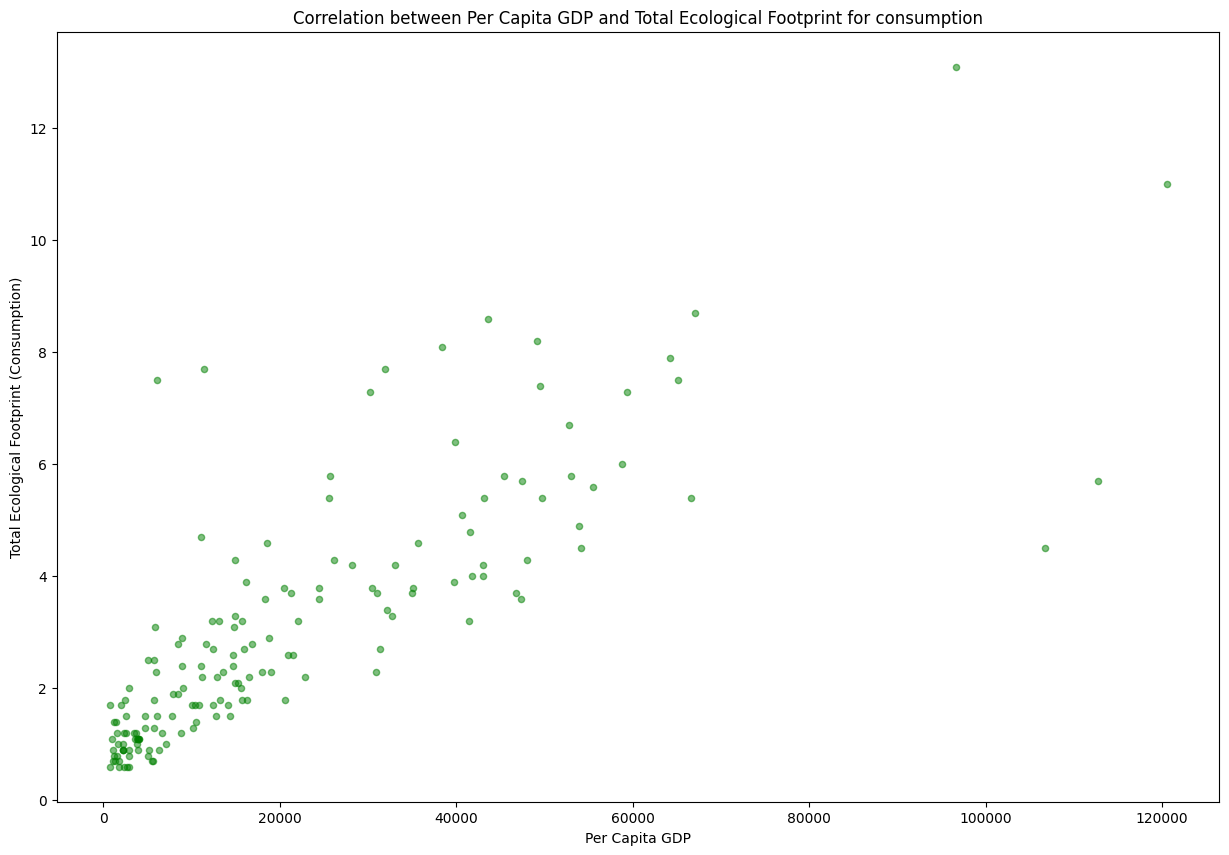

In [18]:
pcgdp_eco_footprint = cleaned_df[['Per Capita GDP', 'Total Ecological Footprint (Consumption)']]
pcgdp_eco_footprint.plot.scatter(
    x='Per Capita GDP', 
    y='Total Ecological Footprint (Consumption)', 
    alpha=0.5, 
    color='green',
    figsize=(15, 10)
)

plt.title("Correlation between Per Capita GDP and Total Ecological Footprint for consumption")
plt.show()

To better express the findings, a correlation must be done. However, Pearson correlation is designed to work with normally distributed data, so to check if the data above fits this, a histogram was used to check if the data visually matches that of a bell shape. Neither variable fits this description, so a Spearman correlation must be used.

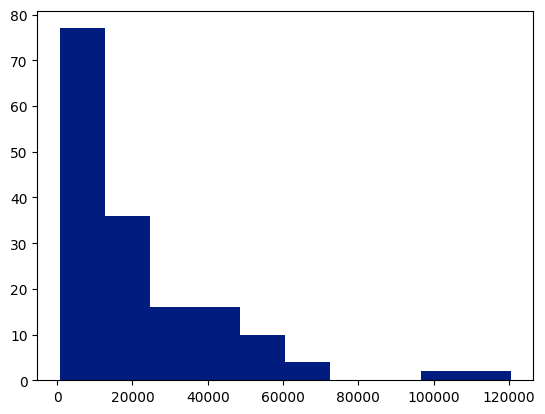

In [19]:
plt.hist(pcgdp_eco_footprint['Per Capita GDP'])
plt.show()

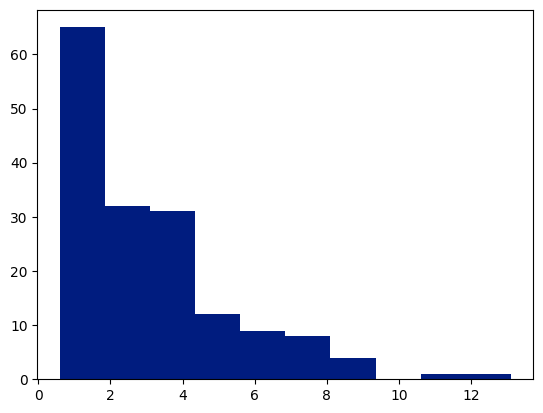

In [20]:
plt.hist(pcgdp_eco_footprint['Total Ecological Footprint (Consumption)'])
plt.show()

To better quantify the correlation between the two variables, a Spearman correlation matrix was used, resulting in a 0.87 correlation coefficient, which indicates a strong positive correlation between the two variables. Spearman was used instead of the default Pearson correlation because the data is not normally distributed.

In [21]:
pcgdp_eco_footprint.corr(method = 'spearman')

,Per Capita GDP,Total Ecological Footprint (Consumption)
Per Capita GDP,1.000000,0.874979
Total Ecological Footprint (Consumption),0.874979,1.000000


## 2. Is there a correlation between a country's population and Total Ecological Footprint for consumption?

A new table was created with population (measured in millions) and total ecological footprint as columns. Then, the two categories were visualized on a scatter plot with Population as the x-axis and total ecological footprint as the y-axis.

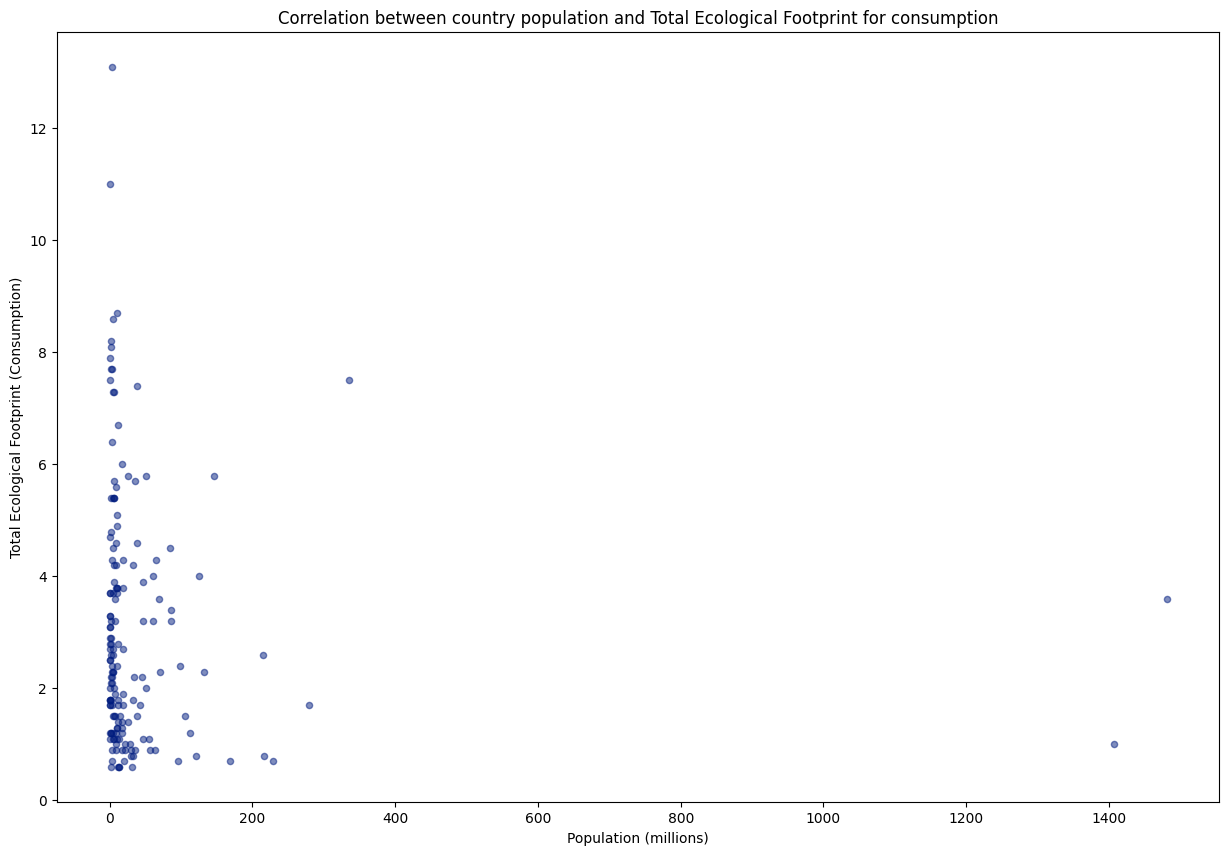

In [22]:
population_eco_footprint = cleaned_df[['Population (millions)', 'Total Ecological Footprint (Consumption)']].copy()
population_eco_footprint.plot.scatter(
    x='Population (millions)', 
    y='Total Ecological Footprint (Consumption)', 
    alpha=0.5,
    figsize=(15, 10)
)

plt.title("Correlation between country population and Total Ecological Footprint for consumption")
plt.show()

Like in the previous question, the data must be checked to see if it is normally distributed or not to see which correlation should be used.

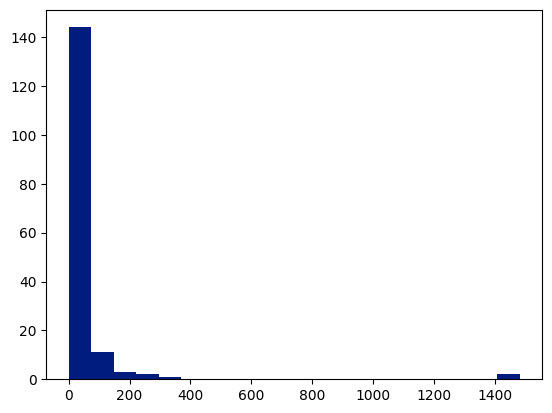

In [23]:
plt.hist(population_eco_footprint['Population (millions)'], bins=20)
plt.show()

Total ecological footprint was checked earlier and was found to not be normally distributed. Population is the same. Thus, a Spearman correlation should be used.

To better quantify the relationship between the two variables, a Spearman correlation matrix was used, resulting in a -0.20 correlation coefficient, suggesting a small negative correlation between the two variables.

In [24]:
population_eco_footprint.corr(method = 'spearman')

,Population (millions),Total Ecological Footprint (Consumption)
Population (millions),1.000000,-0.204379
Total Ecological Footprint (Consumption),-0.204379,1.000000


While intuitively, one might think that the greater a country's population, the greater its ecological footprint for consumption would be, the correlation matrix and the graph above suggest a much smaller correlation between the population of a country and its total ecological footprint for consumption.

## 3. Which region has the highest median total ecological footprint for consumption?

A new table was created where all countries were grouped by their region. Then, the aggregate median of the countries' total ecological footprint were collected. Then, this data was visualized in a bar plot where the x-axis contains the different regions and the y-axis represents the median total ecological footprint. The median was chosen instead of the mean as it is less susceptible to outliers.

,Region,Total Ecological Footprint (Consumption)
,,median
0,Africa,1.15
1,Asia-Pacific,2.35
2,Central America/Caribbean,1.90
3,EU-27,4.55
4,Middle East/Central Asia,3.40
5,North America,7.40
6,Other Europe,3.70
7,South America,2.80


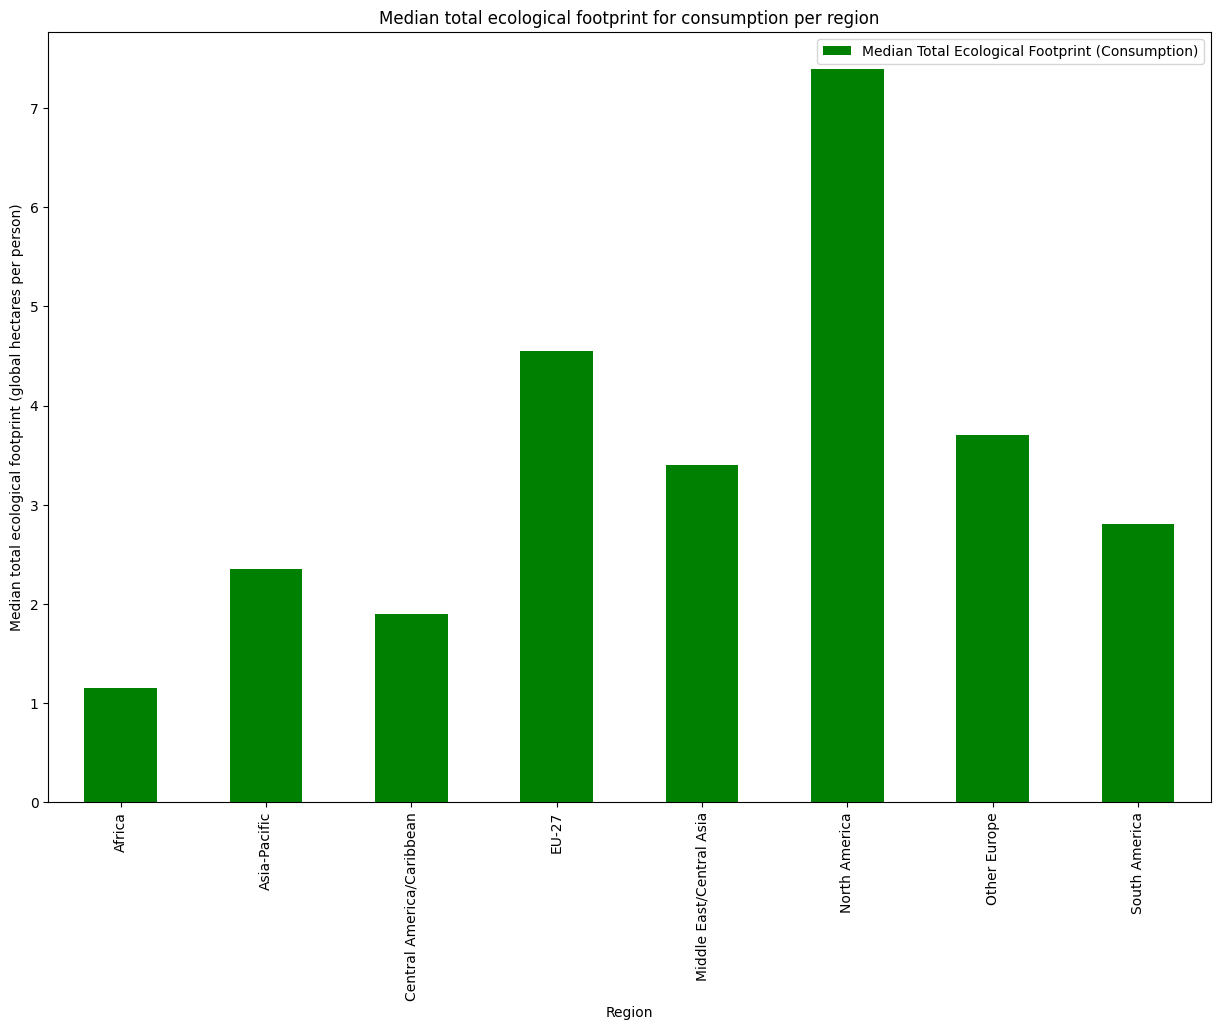

In [25]:
eco_footprint_per_region = cleaned_df.groupby('Region').agg(
    {'Total Ecological Footprint (Consumption)': ['median']}
)

eco_footprint_per_region.reset_index(inplace=True)
eco_footprint_per_region.plot.bar(
    x='Region', 
    y=('Total Ecological Footprint (Consumption)', 'median'), 
    figsize=(15, 10), 
    color='green'
)

plt.title('Median total ecological footprint for consumption per region')
plt.ylabel('Median total ecological footprint (global hectares per person)')
plt.legend(["Median Total Ecological Footprint (Consumption)"])

eco_footprint_per_region

The graph shows that the ecological footprint for consumption of North America has a median of 7.4 global hectares per person. Followed by the European Union with a median of 4.55 global hectares per person.

## 4. Which income group has the highest median Total Ecological Footprint for consumption?

The `index` array allows for a custom ordering of bars in the bar graph. The 'Income Group' column is then set as a categorical variable that uses `index` to define the order of its categories. In this instace, it is order from the lowest income group (LI) to the highest (HI). The dataset abbreviates the income group names as follows:
- LI: Low income
- LM: Lower middle income
- UM: Upper middle income
- HI: High income

Next, the data is grouped by the new categorical income group column, and aggregate median is collected. Lastly, the table is visualized as a bar graph using the income group as the x-axis and the aggregate median total ecological footprint as the y-axis.

,Income Group,Total Ecological Footprint (Consumption)
,,median
0,LI,0.9
1,LM,1.7
2,UM,2.6
3,HI,5.4


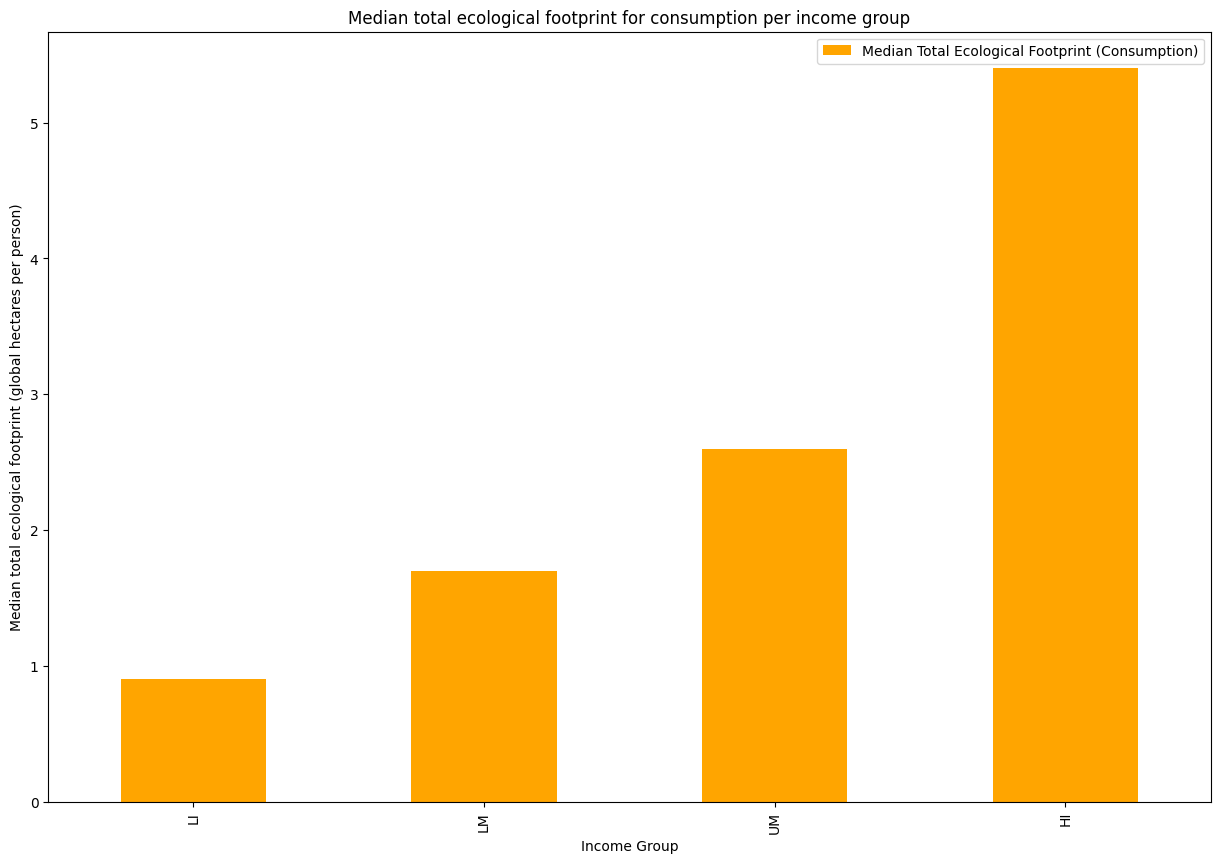

In [26]:
index = ['LI', 'LM', 'UM', 'HI']

cleaned_df['Income Group'] = pd.Categorical(
    cleaned_df['Income Group'], 
    categories=index, 
    ordered=True
)

income_grp_eco_footprint = cleaned_df.groupby('Income Group', observed=True).agg(
    {'Total Ecological Footprint (Consumption)': ['median']}
)

income_grp_eco_footprint.reset_index(inplace=True)
income_grp_eco_footprint.plot.bar(
    x='Income Group', 
    y=('Total Ecological Footprint (Consumption)', 'median'), 
    color='orange', 
    figsize=(15, 10)
)

plt.title('Median total ecological footprint for consumption per income group')
plt.ylabel('Median total ecological footprint (global hectares per person)')
plt.legend(["Median Total Ecological Footprint (Consumption)"])

income_grp_eco_footprint

The bar graph indicates that the high income countries have the highest median total ecological footprint for consumption among the income groups. It can also be determined from the graph that low income countries has the least median total ecological footprint for consumption.

## 5. How many countries are in each income group per region?

In order to determine which region has the most countries per income group, the researchers included a bar graph that indicates the number of countries in each income group per region.

Country                 
                            count                 
Income Group                   LI    LM   UM    HI
Region                                            
Africa                       24.0  16.0  7.0   1.0
Asia-Pacific                  5.0  13.0  4.0   6.0
Central America/Caribbean     1.0   4.0  9.0   3.0
EU-27                         NaN   NaN  3.0  23.0
Middle East/Central Asia      2.0   5.0  5.0   7.0
North America                 NaN   NaN  1.0   2.0
Other Europe                  NaN   1.0  7.0   3.0
South America                 NaN   3.0  8.0   NaN

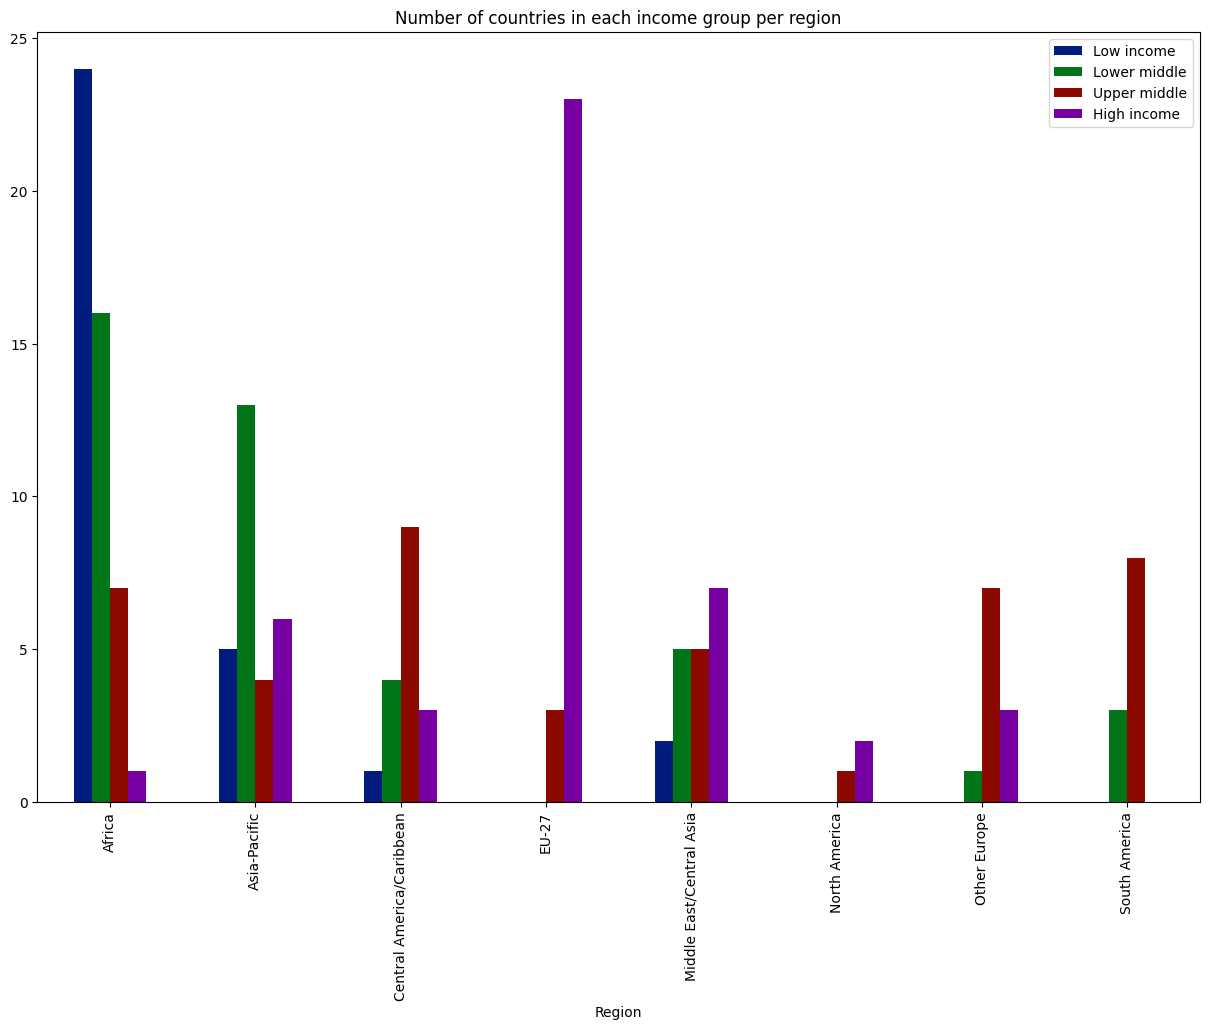

In [27]:
countries_income_group_per_region = cleaned_df.groupby(['Region', 'Income Group'], observed=True).agg(
    {'Country': ['count']}
)

countries_income_group_per_region.reset_index()

countries_income_group_per_region = countries_income_group_per_region.unstack(level='Income Group')
countries_income_group_per_region.plot.bar(
    figsize=(15, 10)
)
plt.legend(['Low income', 'Lower middle', 'Upper middle', 'High income'])
plt.title('Number of countries in each income group per region')

countries_income_group_per_region

The graph identified that the European Union has the most countries that are under high income group. Meanwhile, Africa has the most countries that belong to the low income group.

## 6. Is there a correlation between biocapacity and ecological deficit/reserve?

A graph was created to detemine the presence of a correlation between biocapacity and ecological deficit/reserve. Then, the two categories were visualized on a scatter plot with Total biocapacity as the x-axis and Ecological (Deficit) or Reserve as the y-axis.

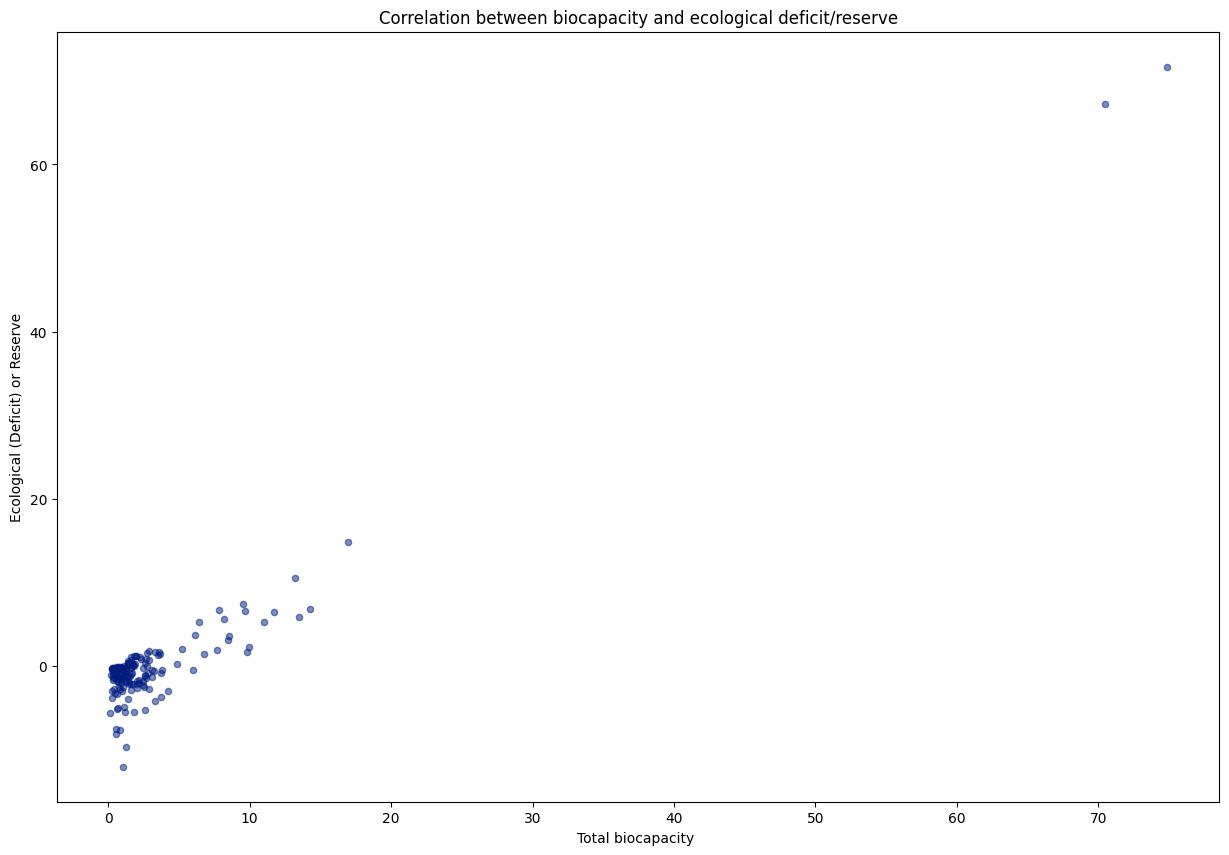

In [28]:
biocapacity_eco_deficit = cleaned_df[['Total biocapacity ', 'Ecological (Deficit) or Reserve']].copy()
biocapacity_eco_deficit.plot.scatter(
    x='Total biocapacity ', 
    y='Ecological (Deficit) or Reserve', 
    alpha=0.5,
    figsize=(15, 10)
)

plt.title("Correlation between biocapacity and ecological deficit/reserve")
plt.show()

Then, the data must be checked to see if it is normally distributed. Biocapacity appears to not be normally distributed, but ecological deficit/reserve is mostly normal. Spearman remains ideal since one of the variables is not normally distributed.

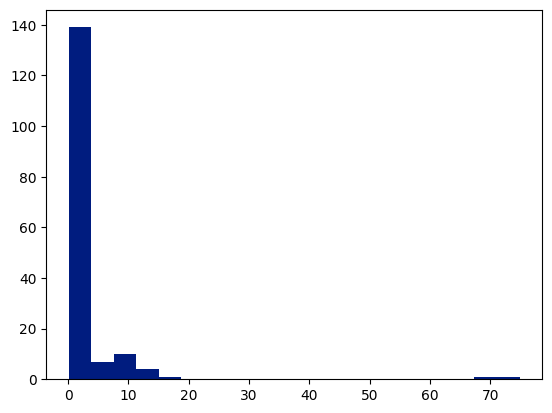

In [29]:
plt.hist(biocapacity_eco_deficit['Total biocapacity '], bins=20)
plt.show()

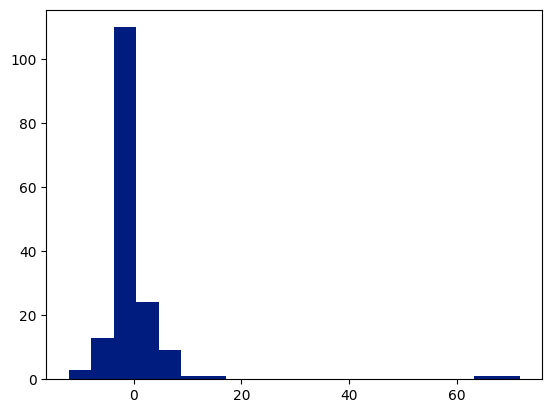

In [30]:
plt.hist(biocapacity_eco_deficit['Ecological (Deficit) or Reserve'], bins=20)
plt.show()

A Spearman correlation matrix was used to quantify the relationship between total biocapacity and ecological deficit/reserve. A correlation coefficient of 0.47 was found, suggesting that the two variables have a positive correlation.

In [31]:
biocapacity_eco_deficit.corr(method = 'spearman')

,Total biocapacity,Ecological (Deficit) or Reserve
Total biocapacity,1.00000,0.47428
Ecological (Deficit) or Reserve,0.47428,1.00000


# IV. Research Question

How is the total ecological footprint of a country affected by its region, per capita GDP, income group, and population?

## Significance of the question
As developing nations grow, it is possible that their resource consumption, and consequently, their ecological footprint, may grow with it. It is important, then, to know how factors, namely, income group and per capita GDP correlate with total ecological footprint of a country. With this study, each country and region have the opportunity to see where they can apply significant economic changes in the subsequent years. They may find better alternatives to reduce their ecological footprint and allowing for better allocation of resources in attempts to address climate change.

## Relevance of exploratory data analysis questions
To find out how region can affect total ecological footprint, the median total ecological footprint of each region was identified. However, it is important to remember that the geographical region is not the only factor affecting the total ecological footprint of a country. As such, other factors such as income group, per capita GDP, and population were identified as being factors that also affect total ecological footprint. Notably, higher income groups were observed to have a higher median total ecological footprint, which is why the number of countries in each income group per region was also explored. Additionally, population was found to not have much of a correlation with the total ecological footprint, despite previous intuition suggesting that it would. 

Knowing how these factors correlate with each other and total ecological footprint gives a comprehensive idea on which countries and regions will likely require the most attention in addressing climate change going forward.

# V. Data Modelling

## Pre-processing

To get a broader sense of how per capita GDP, income group, region, and population affects the total ecological footprint of a country, a data modelling technique called **binning** was used to group together data points in the numerical columns used to answer the research question, such as per capita GDP. Data binning refers to the pre-processing, summarizing, and analyzing data that groups together continuous data into discrete bins or categories in order for the data analysis to be simplified further and the outliers of the dataset to be mitigated properly (Saravanakumar, 2024). Furthermore, it would support the use of the market-basket model for the data mining process in the latter part of the case study.

### 1. Population

The groups formed below are based on the quartiles of data, labelled by "Small Population" for the bottom 25%, "Medium Population" for the next 25%, "High Population" for the next 25%, and "Very High Population" for the top 25%.

In [32]:
labels = ['Small Population', 'Medium Population', 'High Population', 'Very High Population']
cleaned_df['Population (millions)'] = pd.qcut(cleaned_df['Population (millions)'], q=[0, .25, .5, .75, 1], labels=labels)

cleaned_df[['Country', 'Population (millions)']]

,Country,Population (millions)
1,Albania,Medium Population
2,Algeria,Very High Population
3,Angola,Very High Population
4,Antigua and Barbuda,Small Population
5,Argentina,Very High Population
...,...,...
173,United States of America,Very High Population
174,Uruguay,Medium Population
176,Vanuatu,Small Population
178,Viet Nam,Very High Population


The table above presents pre-processed data of the countries and their corresponding groups based on their population (millions).

### 2. Per Capita GDP

A similar process is followed for Per Capita GDP as was done for Population. Each bin also represents a quarter of the data.

In [33]:
labels = ['Low Per Capita GDP', 'Medium Per Capita GDP', 'High Per Capita GDP', 'Very High Per Capita GDP']
cleaned_df['Per Capita GDP'] = pd.qcut(cleaned_df['Per Capita GDP'], q=[0, .25, .5, .75, 1], labels=labels)

cleaned_df[['Country', 'Per Capita GDP']]

,Country,Per Capita GDP
1,Albania,High Per Capita GDP
2,Algeria,Medium Per Capita GDP
3,Angola,Medium Per Capita GDP
4,Antigua and Barbuda,High Per Capita GDP
5,Argentina,High Per Capita GDP
...,...,...
173,United States of America,Very High Per Capita GDP
174,Uruguay,High Per Capita GDP
176,Vanuatu,Low Per Capita GDP
178,Viet Nam,Medium Per Capita GDP


The table above presents pre-processed data of the countries and their corresponding groups based on their Per Capita GDP.

Two other columns, Region and Income Group, mentioned in the research question are already categorical data so no further pre-processing will be done for those columns.

### 3. Region

In [34]:
cleaned_df[['Country', 'Region']]

,Country,Region
1,Albania,Other Europe
2,Algeria,Africa
3,Angola,Africa
4,Antigua and Barbuda,Central America/Caribbean
5,Argentina,South America
...,...,...
173,United States of America,North America
174,Uruguay,South America
176,Vanuatu,Asia-Pacific
178,Viet Nam,Asia-Pacific


The table above presents the countries and their corresponding region.

### 4. Income Group

In [35]:
cleaned_df[['Country', 'Income Group']]

,Country,Income Group
1,Albania,UM
2,Algeria,UM
3,Angola,LM
4,Antigua and Barbuda,HI
5,Argentina,UM
...,...,...
173,United States of America,HI
174,Uruguay,UM
176,Vanuatu,LM
178,Viet Nam,LM


The table above presents the countries and their corresponding income group. The data in the income group column are abbreviated as follows:
- HI: High income
- UM: Upper middle income
- LM: Lower middle income
- LI: Low income

A copy of the DataFrame was created specifically for the data modelling portion.

In [36]:
labels = ['Low Total Ecological Footprint', 'Medium Total Ecological Footprint', 'High Total Ecological Footprint', 'Very High Total Ecological Footprint']
cleaned_df['Total Ecological Footprint (Consumption)'] = pd.qcut(cleaned_df['Total Ecological Footprint (Consumption)'], q=[0, .25, .5, .75, 1], labels=labels)

## Matrix one-hot conversion

The dataset must then be converted to a matrix to fit into the market-basket model, where each of the items is a value from a column we are interested in, and each country is a "basket" containing those items. However, the original dataset will still be used for the statistical inference section, so a separate copy was made here specifially for the data mining section.

The country names are stored separately, because the DataFrame to perform Rule Mining operations on must only contain the items (variables to operate on).

In [37]:
# Create a copy of the dataset with only the variables concerning the research question
# to be converted into a one-hot encoded matrix.
country_names = cleaned_df['Country']
rm_df = cleaned_df[['Region', 'Per Capita GDP', 'Income Group', 'Population (millions)', 'Total Ecological Footprint (Consumption)']]

rm_df

,Region,Per Capita GDP,Income Group,Population (millions),Total Ecological Footprint (Consumption)
1,Other Europe,High Per Capita GDP,UM,Medium Population,Medium Total Ecological Footprint
2,Africa,Medium Per Capita GDP,UM,Very High Population,Medium Total Ecological Footprint
3,Africa,Medium Per Capita GDP,LM,Very High Population,Low Total Ecological Footprint
4,Central America/Caribbean,High Per Capita GDP,HI,Small Population,High Total Ecological Footprint
5,South America,High Per Capita GDP,UM,Very High Population,High Total Ecological Footprint
...,...,...,...,...,...
173,North America,Very High Per Capita GDP,HI,Very High Population,Very High Total Ecological Footprint
174,South America,High Per Capita GDP,UM,Medium Population,Medium Total Ecological Footprint
176,Asia-Pacific,Low Per Capita GDP,LM,Small Population,Medium Total Ecological Footprint
178,Asia-Pacific,Medium Per Capita GDP,LM,Very High Population,Medium Total Ecological Footprint


An integer value is assigned to each item. As expected, 24 items are present, represented from 0 - 23:
- 8 regions;
- 4 per capita GDP classifications;
- 4 income group classifications;
- 4 population classifiations;
- and 4 total ecological footprint classifiations.

In [38]:
# Get all the values from the dataset.
values = rm_df.values.ravel()

# Filter all unique values from the dataset.
values = [value for value in pd.unique(values) if not pd.isnull(value)]

# Create a dictionary where the original item name corresponds to an integer.
value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    print(value, "-", i)

Other Europe - 0
High Per Capita GDP - 1
UM - 2
Medium Population - 3
Medium Total Ecological Footprint - 4
Africa - 5
Medium Per Capita GDP - 6
Very High Population - 7
LM - 8
Low Total Ecological Footprint - 9
Central America/Caribbean - 10
HI - 11
Small Population - 12
High Total Ecological Footprint - 13
South America - 14
Middle East/Central Asia - 15
Asia-Pacific - 16
Very High Per Capita GDP - 17
High Population - 18
Very High Total Ecological Footprint - 19
EU-27 - 20
LI - 21
Low Per Capita GDP - 22
North America - 23


Then, the baskets are created from the DataFrame by converting it into list form. Each country should have 5 items, since 5 columns were selected as being important to the research question.

In [39]:
# Reshape the DataFrame such that it can be converted into a basket list format.
rm_df = rm_df.stack().map(value_dict).unstack()

# Create the baskets from the DataFrame.
baskets = []
for i in range(rm_df.shape[0]):
    basket = np.sort([int(x) for x in rm_df.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

for i, basket in enumerate(baskets):
    print(country_names.iloc[i], basket)

Albania [0 1 2 3 4]
Algeria [2 4 5 6 7]
Angola [5 6 7 8 9]
Antigua and Barbuda [ 1 10 11 12 13]
Argentina [ 1  2  7 13 14]
Armenia [ 3  4  6  8 15]
Australia [11 16 17 18 19]
Austria [ 3 11 17 19 20]
Azerbaijan [ 1  2  4 15 18]
Bahrain [11 12 15 17 19]
Bangladesh [ 6  7  9 16 21]
Barbados [ 1 10 11 12 13]
Belarus [ 0  1  2  3 19]
Belgium [11 17 18 19 20]
Belize [ 2  6 10 12 19]
Benin [ 5  9 18 21 22]
Bhutan [ 6  8 12 16 19]
Bolivia [ 6  8 13 14 18]
Bosnia and Herzegovina [ 0  1  2  3 19]
Botswana [ 1  2  4  5 12]
Brazil [ 1  2  7 13 14]
Brunei Darussalam [11 12 16 17 19]
Bulgaria [ 1  2  3 13 20]
Burkina Faso [ 5  9 18 21 22]
Burundi [ 5  9 18 21 22]
Cabo Verde [ 5  6  8  9 12]
Cambodia [ 9 16 18 21 22]
Cameroon [ 5  8  9 18 22]
Canada [ 7 11 17 19 23]
Central African Republic [ 3  5  9 21 22]
Chad [ 4  5 18 21 22]
Chile [ 1  2 13 14 18]
China [ 1  2  7 13 16]
Colombia [ 1  2  4  7 14]
Comoros [ 4  5 12 21 22]
Congo [ 3  5  8  9 22]
Congo, Democratic Republic of [ 5  7  9 21 22]
Costa 

Then, the list of countries is converted to a matrix of one-hot encoded values, where the columns represent the unique values, and a '1' or a '0' is encoded for each country under each column if it has the item or not.

In [40]:
# Convert the DataFrame to a one-hot encoded matrix.
# There are 24 unique values, so 24 is passed as the column range
# in the first list comprehension.
rm_df = pd.DataFrame([[0 for _ in range(24)] for _ in range(rm_df.shape[0])], columns=values)

for i, basket in enumerate(baskets):
    rm_df.iloc[i, basket] = 1

rm_df.head()

,Other Europe,High Per Capita GDP,UM,Medium Population,Medium Total Ecological Footprint,Africa,Medium Per Capita GDP,Very High Population,LM,Low Total Ecological Footprint,...,South America,Middle East/Central Asia,Asia-Pacific,Very High Per Capita GDP,High Population,Very High Total Ecological Footprint,EU-27,LI,Low Per Capita GDP,North America
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


## Association Rule Mining (Market-basket model)

To form a more solid association between our variables, the **market-basket model** was used in order to find characteristics of countries that frequently show up with one another. This will be further explained in the "Association Rule Mining" section.

In the interest of accessibility to non-programmers and keeping the data analysis portion of the research separate from the implementation of methods, the code for the rule miner is in a separate `ruleMiner.py` file that should come with this file, if you are interested in viewing the code.

A Rule Miner object was created with a support value of 30 and a confidence threshold of 0.6. This allows for rule miner functionality such as getting the association rules to be accessible within this notebook.

In [41]:
rm = RuleMiner(20, 0.6)

In [42]:
association_rules = rm.get_association_rules(rm_df)

for rule in association_rules:
    print(rule[0], '->', rule[1])

['Africa', 'LI'] -> ['Low Total Ecological Footprint']
['Africa', 'Low Total Ecological Footprint'] -> ['LI']
['LI'] -> ['Africa', 'Low Total Ecological Footprint']
['LI', 'Low Total Ecological Footprint'] -> ['Africa']
['Africa', 'Low Per Capita GDP'] -> ['Low Total Ecological Footprint']
['Africa', 'Low Total Ecological Footprint'] -> ['Low Per Capita GDP']
['Low Per Capita GDP'] -> ['Africa', 'Low Total Ecological Footprint']
['Low Per Capita GDP', 'Low Total Ecological Footprint'] -> ['Africa']
['Africa', 'LI'] -> ['Low Per Capita GDP']
['Africa', 'Low Per Capita GDP'] -> ['LI']
['LI'] -> ['Africa', 'Low Per Capita GDP']
['LI', 'Low Per Capita GDP'] -> ['Africa']
['LI', 'Low Per Capita GDP'] -> ['Low Total Ecological Footprint']
['LI', 'Low Total Ecological Footprint'] -> ['Low Per Capita GDP']
['Low Per Capita GDP', 'Low Total Ecological Footprint'] -> ['LI']
['LI'] -> ['Low Per Capita GDP', 'Low Total Ecological Footprint']
['HI', 'Very High Per Capita GDP'] -> ['Very High Total 

# VII. Statistical Inference

The data originally contained a mixture of categorical and numerical data, however, due to the binning process, all of the variables concerning the research question aside from the total ecological footprint are categorical. As such, tests of independence were performed by using Pearson Chi-Square.//TODO

## Pre-processing

First, the DataFrame must be converted such that only the necessary columns are present.

In [43]:
si_df = cleaned_df[['Region', 'Per Capita GDP', 'Income Group', 'Population (millions)', 'Total Ecological Footprint (Consumption)']]
si_df.head()

,Region,Per Capita GDP,Income Group,Population (millions),Total Ecological Footprint (Consumption)
1,Other Europe,High Per Capita GDP,UM,Medium Population,Medium Total Ecological Footprint
2,Africa,Medium Per Capita GDP,UM,Very High Population,Medium Total Ecological Footprint
3,Africa,Medium Per Capita GDP,LM,Very High Population,Low Total Ecological Footprint
4,Central America/Caribbean,High Per Capita GDP,HI,Small Population,High Total Ecological Footprint
5,South America,High Per Capita GDP,UM,Very High Population,High Total Ecological Footprint


## Tests of Independence (Pearson Chi-Square Test)

Pearson's Chi-Square test was used to determine the relation of the various columns (Region, Per Capita GDP, Income Group, Population) with the total ecological footprint for consumption.

### 1. Region independence test

Check if the total ecological footprint of a country is independent of the region it belongs to.

First, the DataFrame was converted to a grouped table.

In [44]:
counts = si_df.groupby(['Total Ecological Footprint (Consumption)', 'Region'], observed=False).size()
counts

Total Ecological Footprint (Consumption)  Region                   
Low Total Ecological Footprint            Africa                       29
                                          Asia-Pacific                  9
                                          Central America/Caribbean     2
                                          EU-27                         0
                                          Middle East/Central Asia      3
                                          North America                 0
                                          Other Europe                  0
                                          South America                 0
Medium Total Ecological Footprint         Africa                       15
                                          Asia-Pacific                  6
                                          Central America/Caribbean     9
                                          EU-27                         0
                                          Mi

Then, it was converted to the proper table format for the `chi2_contingency()` method to work.

In [45]:
table = counts.unstack(level=1)
table

Region,Africa,Asia-Pacific,Central America/Caribbean,EU-27,Middle East/Central Asia,North America,Other Europe,South America
Total Ecological Footprint (Consumption),,,,,,,,
Low Total Ecological Footprint,29,9,2,0,3,0,0,0
Medium Total Ecological Footprint,15,6,9,0,4,1,2,4
High Total Ecological Footprint,4,5,4,9,4,0,5,7
Very High Total Ecological Footprint,0,8,2,17,8,2,4,0


With the table in the proper format, the p-value was calculated with the Chi-Square method from SciPy.

In [46]:
chi2 = chi2_contingency(table)
p_value = chi2_contingency(table)[1]
print("P-value:", p_value)

P-value: 3.0610141794820045e-13


H0: The total ecological footprint of a country is independent of the region it belongs to. <br>
H1: The total ecological footprint of a country is dependent of the region it belongs to.

At a significance level of 0.05:<br>
The p-value 3.0610e-13 is less than the significance level 0.05, thus reject the null hypothesis. Therefore, the total ecological footprint of a country is dependent of the region it belongs to.

### 2. Income group independence test

Check if the total ecological footprint of a country is independent of the income group it belongs to.

First, the DataFrame was converted to a grouped table.

In [47]:
counts = si_df.groupby(['Total Ecological Footprint (Consumption)', 'Income Group'], observed=False).size()
counts

Total Ecological Footprint (Consumption)  Income Group
Low Total Ecological Footprint            LI              26
                                          LM              16
                                          UM               1
                                          HI               0
Medium Total Ecological Footprint         LI               6
                                          LM              15
                                          UM              19
                                          HI               1
High Total Ecological Footprint           LI               0
                                          LM               9
                                          UM              17
                                          HI              12
Very High Total Ecological Footprint      LI               0
                                          LM               2
                                          UM               7
                              

Then, it was converted to the proper table format for the `chi2_contingency()` method to work.

In [48]:
table = counts.unstack(level=1)
table

Income Group,LI,LM,UM,HI
Total Ecological Footprint (Consumption),,,,
Low Total Ecological Footprint,26,16,1,0
Medium Total Ecological Footprint,6,15,19,1
High Total Ecological Footprint,0,9,17,12
Very High Total Ecological Footprint,0,2,7,32


With the table in the proper format, the p-value was calculated with the Chi-Square method from SciPy.

In [49]:
chi2 = chi2_contingency(table)
p_value = chi2_contingency(table)[1]
print("P-value:", p_value)

P-value: 1.403682112046429e-26


H0: The total ecological footprint of a country is independent of the income group it belongs to. <br>
H1: The total ecological footprint of a country is dependent of the income group it belongs to.

At a significance level of 0.05:<br>
The p-value 1.4037e-26 is less than the significance level 0.05, thus reject the null hypothesis. Therefore, the total ecological footprint of a country is dependent of the income group it belongs to.

### 3. Per Capita GDP independence test

Check if the total ecological footprint of a country is independent of its Per Capita GDP.

First, the DataFrame was converted to a grouped table.

In [50]:
counts = si_df.groupby(['Total Ecological Footprint (Consumption)', 'Per Capita GDP'], observed=False).size()
counts

Total Ecological Footprint (Consumption)  Per Capita GDP          
Low Total Ecological Footprint            Low Per Capita GDP          33
                                          Medium Per Capita GDP       10
                                          High Per Capita GDP          0
                                          Very High Per Capita GDP     0
Medium Total Ecological Footprint         Low Per Capita GDP           8
                                          Medium Per Capita GDP       19
                                          High Per Capita GDP         14
                                          Very High Per Capita GDP     0
High Total Ecological Footprint           Low Per Capita GDP           0
                                          Medium Per Capita GDP        9
                                          High Per Capita GDP         19
                                          Very High Per Capita GDP    10
Very High Total Ecological Footprint      Low Per Capita 

Then, it was converted to the proper table format for the `chi2_contingency()` method to work.

In [51]:
table = counts.unstack(level=1)
table

Per Capita GDP,Low Per Capita GDP,Medium Per Capita GDP,High Per Capita GDP,Very High Per Capita GDP
Total Ecological Footprint (Consumption),,,,
Low Total Ecological Footprint,33,10,0,0
Medium Total Ecological Footprint,8,19,14,0
High Total Ecological Footprint,0,9,19,10
Very High Total Ecological Footprint,0,3,7,31


With the table in the proper format, the p-value was calculated with the Chi-Square method from SciPy.

In [52]:
chi2 = chi2_contingency(table)
p_value = chi2_contingency(table)[1]
print("P-value:", p_value)

P-value: 9.958211997045722e-31


H0: The total ecological footprint of a country is independent of its Capita Per GDP. <br>
H1: The total ecological footprint of a country is dependent of its Capita Per GDP.

At a significance level of 0.05:<br>
The p-value 9.9582e-31 is less than the significance level 0.05, thus reject the null hypothesis. Therefore, the total ecological footprint of a country is dependent of its Capita Per GDP.

### 4. Population independence test

Check if the total ecological footprint of a country is independent of its population.

First, the DataFrame was converted to a grouped table.

In [53]:
counts = si_df.groupby(['Total Ecological Footprint (Consumption)', 'Population (millions)'], observed=False).size()
counts

Total Ecological Footprint (Consumption)  Population (millions)
Low Total Ecological Footprint            Small Population          6
                                          Medium Population         7
                                          High Population          18
                                          Very High Population     12
Medium Total Ecological Footprint         Small Population         10
                                          Medium Population        11
                                          High Population          10
                                          Very High Population     10
High Total Ecological Footprint           Small Population         15
                                          Medium Population         8
                                          High Population           5
                                          Very High Population     10
Very High Total Ecological Footprint      Small Population         10
                          

Then, it was converted to the proper table format for the `chi2_contingency()` method to work.

In [54]:
table = counts.unstack(level=1)
table

Population (millions),Small Population,Medium Population,High Population,Very High Population
Total Ecological Footprint (Consumption),,,,
Low Total Ecological Footprint,6,7,18,12
Medium Total Ecological Footprint,10,11,10,10
High Total Ecological Footprint,15,8,5,10
Very High Total Ecological Footprint,10,15,7,9


With the table in the proper format, the p-value was calculated with the Chi-Square method from SciPy.

In [55]:
chi2 = chi2_contingency(table)
p_value = chi2_contingency(table)[1]
print("P-value:", p_value)

P-value: 0.04064613049787365


H0: The total ecological footprint of a country is independent of its population. <br>
H1: The total ecological footprint of a country is dependent of its population.

At a significance level of 0.05:<br>
The p-value 0.0406 is less than the significance level 0.05, thus reject the null hypothesis. Therefore, the total ecological footprint of a country is dependent of its population.

# VIII. Insights and Conclusion

# IX. References
@JAINA. (2024). *Global Ecological Footprint 2023🌐\[latest report\]*. Kaggle. https://www.kaggle.com/datasets/jainaru/global-ecological-footprint-2023.

Collins Dictionary. (n.d.). *fishing ground*. https://www.collinsdictionary.com/dictionary/english/fishing-ground

Econation. (n.d.). *Ecological footprint defined*. https://econation.one/ecological-footprint-defined/

Esteban Ortiz-Ospina. (2017). *"Life Expectancy" – What does this actually mean?*. Published online at OurWorldInData.org. https://ourworldindata.org/life-expectancy-how-is-it-calculated-and-how-should-it-be-interpreted.

European Environment Agency. (n.d). *built-up land*. https://www.eea.europa.eu/help/glossary/eea-glossary/built-up-land 

Foreign-Assisted and Special Projects Service. (n.d.). *forest land*. https://fasps.denr.gov.ph/index.php/resources/glossary-of-terms/forest-land

Foreign-Assisted and Special Projects Service. (n.d.). *grazing land*. https://fasps.denr.gov.ph/index.php/resources/glossary-of-terms/grazing-land

Investopedia. (2024). *GDP Per Capita: Definition, Uses, and Highest Per Country*. https://www.investopedia.com/terms/p/per-capita-gdp.asp.

Merriam-Webster. (2024). *Population definition*. https://www.merriam-webster.com/dictionary/population

Saravanakumar, N. (2024). *Data Binning*. WallStreetMojo. https://www.wallstreetmojo.com/data-binning/#:~:text=Data%20binning%20is%20a%20pre,to%20derive%20a%20representative%20value.

UN Sustainable Development Solutions Network. (2022). *Sustainable Development Goals Index*. https://www.sdgindex.org/. 

United Nations Development Programme. (2023). *Human Development Report*. http://hdr.undp.org/en/data.
 
International Monetary Fund. (2023). *World Economic Outlook*. https://www.imf.org/en/Publications/WEO

Hamadeh, N., Van Rompaey, C, & Metreau, E. (2023). *World Bank Group country classifications by income level for FY24 (July 1, 2023- June 30, 2024)*. https://blogs.worldbank.org/en/opendata/new-world-bank-group-country-classifications-income-level-fy24

York University Ecological Footprint Initiative & Global Footprint Network. *Public Data Package of the National Footprint and Biocapacity Accounts, 2023 edition*. Produced for the Footprint Data Foundation and distributed by Global Footprint Network. https://data.footprintnetwork.org.